# **Bank Loan Defaults**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
    This problem is important to solve because it will improve the accuracy of determining who will mostly likely default on their loan. This will inturn help the bank give out better loads to people who will actually pay them back.<br> 
**The objectives:** What is the intended goal?<br>
    The goal is to build a classification model that will take the given inputs and determine if the customer will default on their load or not. This model should be free of any bias. We will also give any recomendations back to the bank on any important features to consider when approving a loan. <br>
**The key questions:** What are the key questions that need to be answered?<br>
What are the key features to determine if someone will default on a loan? <br>
**The problem formulation:** What is it that we are trying to solve using data science?<br>
We are trying to use data science to eleminate the human error and bias that comes into determining if someone will default on the loan or not. 

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

### **Import the necessary libraries**

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score,precision_recall_curve

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [100]:
hm=pd.read_csv("hmeq.csv")

In [101]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [102]:
# Display first five rows

data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [103]:
# Display last 5 rows
data.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

### **Understand the shape of the dataset**

In [104]:
# Check the shape of the data
data.shape

(5960, 13)

**Insights There are some missing values, we can see this in the first five lines. We also have 12 imputs for our 1 output of BAD. There are 5960 rows of data in our data set. Having an option like "other" for job seems kind of vague. The missing values are going to need to be addressed if we want an accurate model.**

### **Check the data types of the columns**

In [105]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights: We have a lot of null values in multiple columns. Otherwise the data types all mades sense for thier respective columns.**

### **Check for missing values**

In [106]:
# Analyse missing values - Hint: use isnull() function
print(data.isnull())
print(data.isnull().sum())

        BAD   LOAN  MORTDUE  VALUE  REASON    JOB    YOJ  DEROG  DELINQ  \
0     False  False    False  False   False  False  False  False   False   
1     False  False    False  False   False  False  False  False   False   
2     False  False    False  False   False  False  False  False   False   
3     False  False     True   True    True   True   True   True    True   
4     False  False    False  False   False  False  False  False   False   
...     ...    ...      ...    ...     ...    ...    ...    ...     ...   
5955  False  False    False  False   False  False  False  False   False   
5956  False  False    False  False   False  False  False  False   False   
5957  False  False    False  False   False  False  False  False   False   
5958  False  False    False  False   False  False  False  False   False   
5959  False  False    False  False   False  False  False  False   False   

      CLAGE   NINQ   CLNO  DEBTINC  
0     False  False  False     True  
1     False  False  False

In [107]:
# Check the percentage of missing values in the each column.
data.isnull().sum() * 100 / len(data)

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

**Insights: We have several categories that are missing significant amount of data. Specifically DEBTINC, DEROG, and DELINQ.**

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [108]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [109]:
cols

['REASON', 'JOB', 'BAD']

In [110]:
# Changing the data type of object type column to category. hint use astype() function

for i in cols:
    data[i] = data[i].astype('category')

In [111]:
# Checking the info again and the datatype of different variable

data.dtypes

BAD        category
LOAN          int64
MORTDUE     float64
VALUE       float64
REASON     category
JOB        category
YOJ         float64
DEROG       float64
DELINQ      float64
CLAGE       float64
NINQ        float64
CLNO        float64
DEBTINC     float64
dtype: object

### **Analyze Summary Statistics of the dataset**

In [112]:
# Analyze the summary statistics for numerical variables

data.describe().T

count           mean           std          min           25%  \
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

**Insights There seems to be some very high values of homes compared to the mean of 5,848, with the max beeing almost 200x bigger. DEROG seems to just have several outlayers on the high side with the majority of people having zero. The same can be said for DELINQ. The oldest credit line is almost 100 years old. That looks a little off. Also the max number of 71 credit lines is a little alarming as well. **

In [113]:
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']

data.describe(include=['category']).T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

**Insights There seems to not be a lot of information with JOB since there are only 6 categories and the majority have chosen Other. This could be an area of improvment for the future. It also looks like the majority of our loans are not bad loans and are getting repaid which is a good thing, but can be improved. **

**Let's look at the unique values in all the categorical variables**

In [114]:
# Checking the count of unique values in each categorical column 
#cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(pd.unique(cols_cat[i]))
    print('*'*40)

Unique values in BAD are :
[1, 0]
Categories (2, int64): [1, 0]
****************************************
Unique values in REASON are :
['HomeImp', NaN, 'DebtCon']
Categories (2, object): ['HomeImp', 'DebtCon']
****************************************
Unique values in JOB are :
['Other', NaN, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self']
Categories (6, object): ['Other', 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self']
****************************************


**Insights: Both Reason and Job have NaN values which can be an issue. Also, the number of unique options for Job is very limited to just several positions. This could be an issue. **

### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure? 
- If not, what else can be used? Try implementing that. 

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [115]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

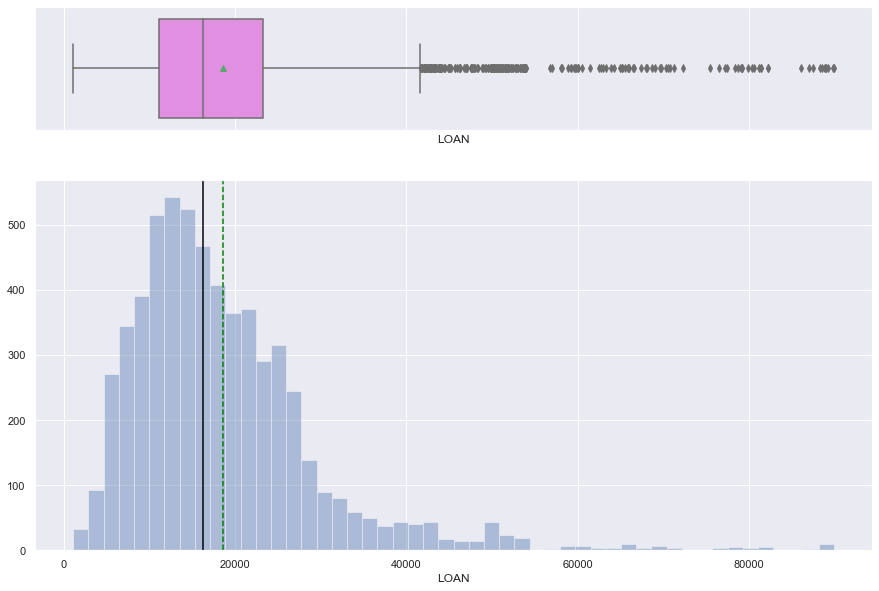

In [116]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights: Our data is skewed to the right. It seems we have quite a few outlayers above the 4 quartile of our box plot. If that data is set aside, our data is pretty normally distributed. **

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

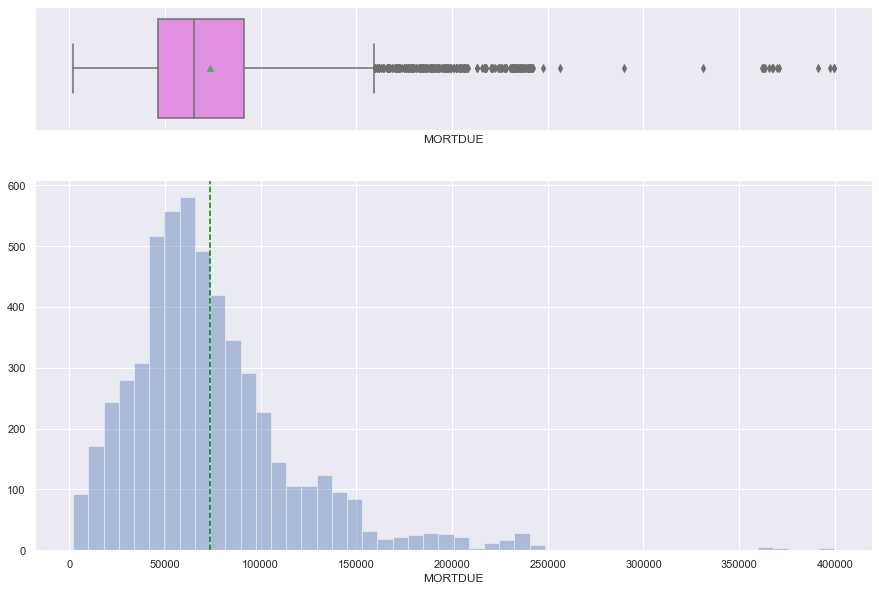

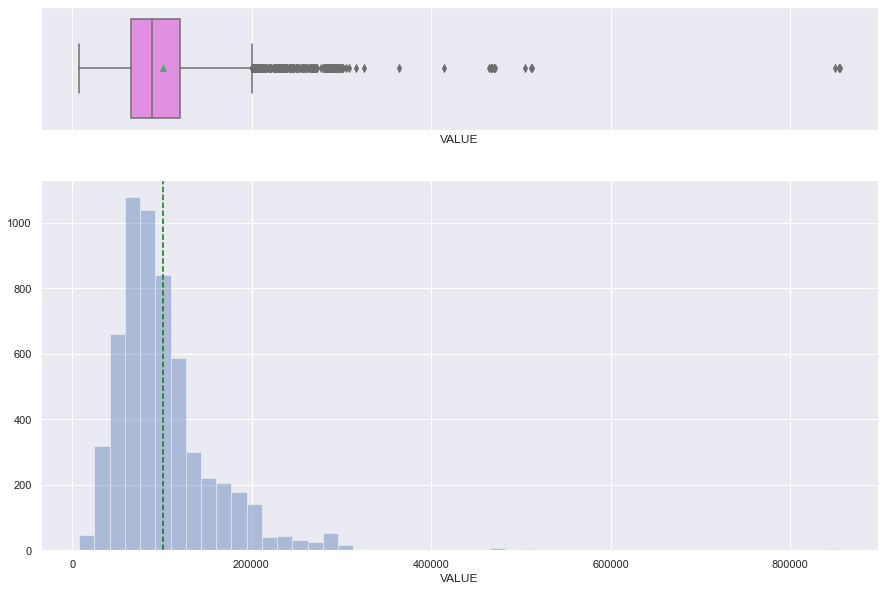

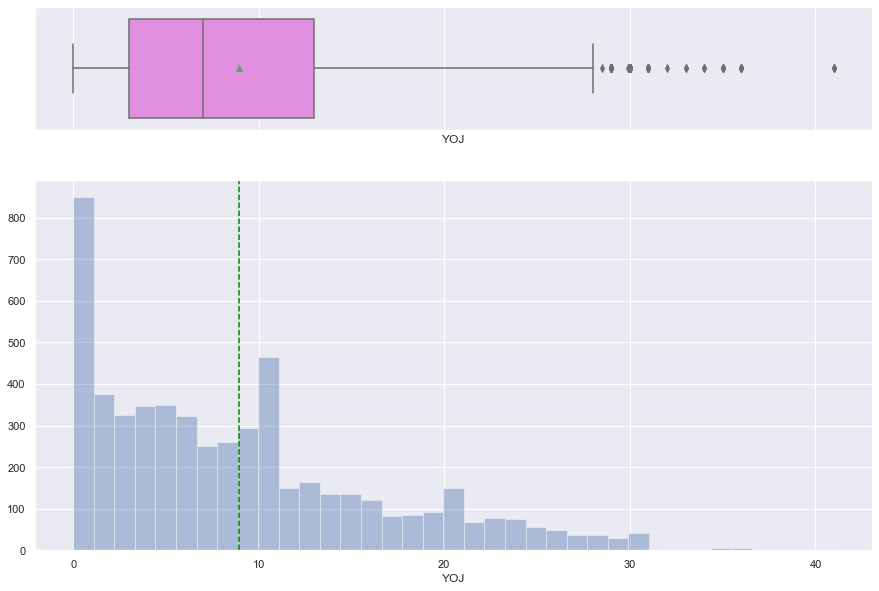

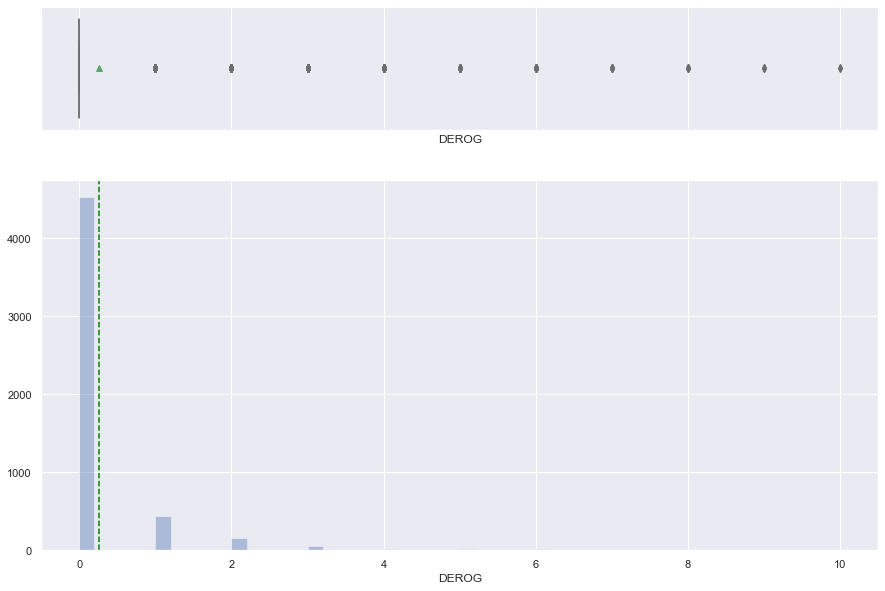

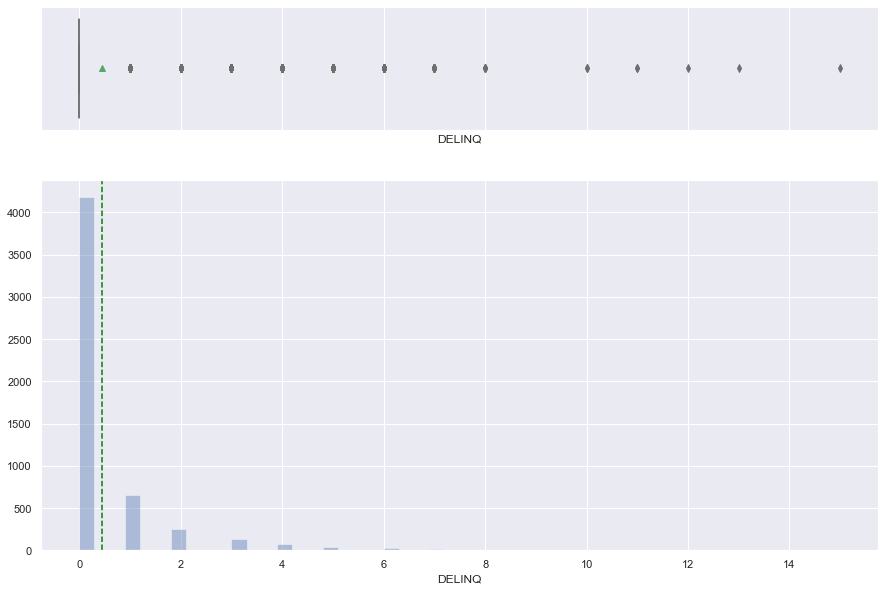

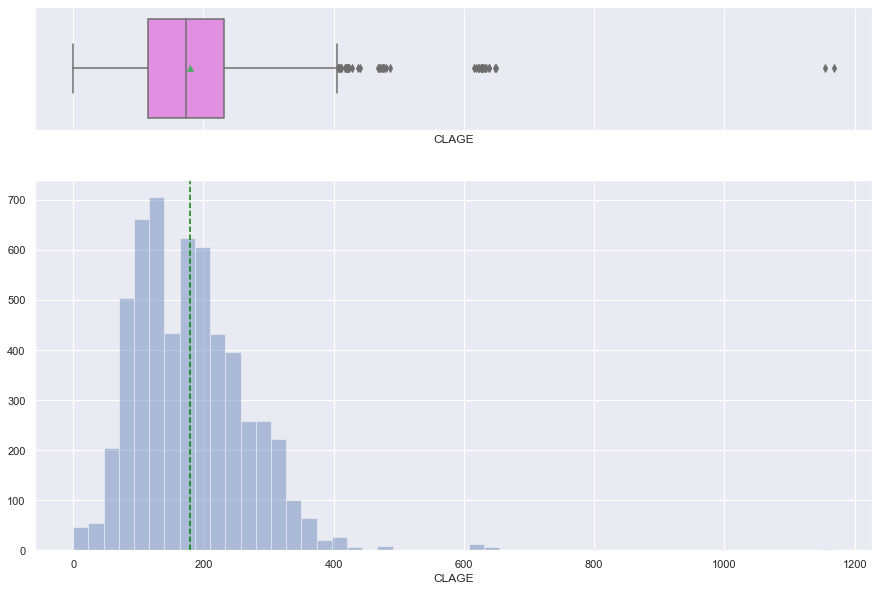

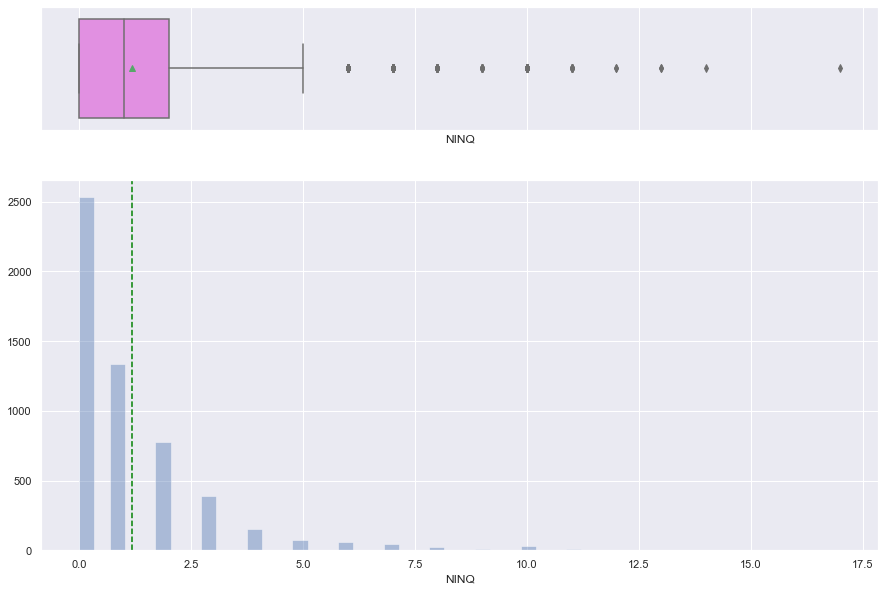

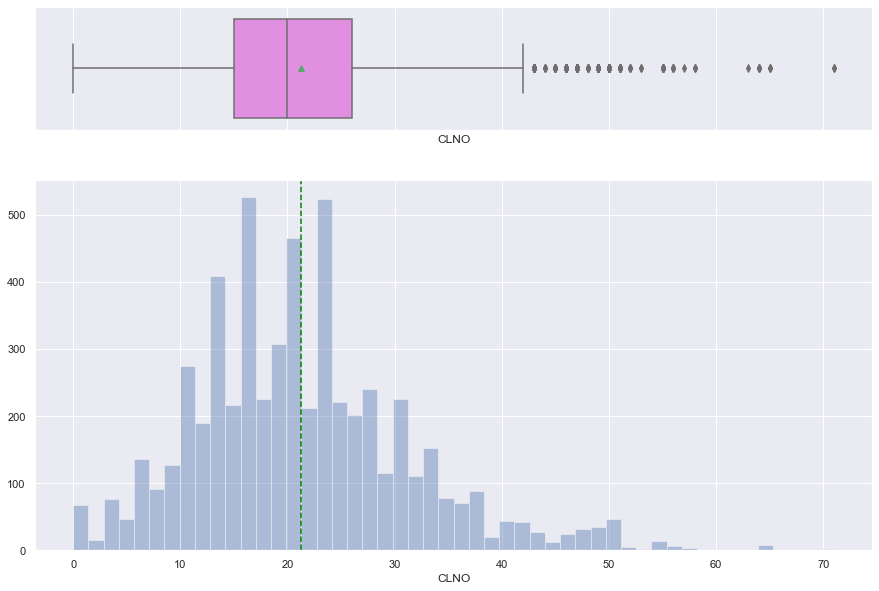

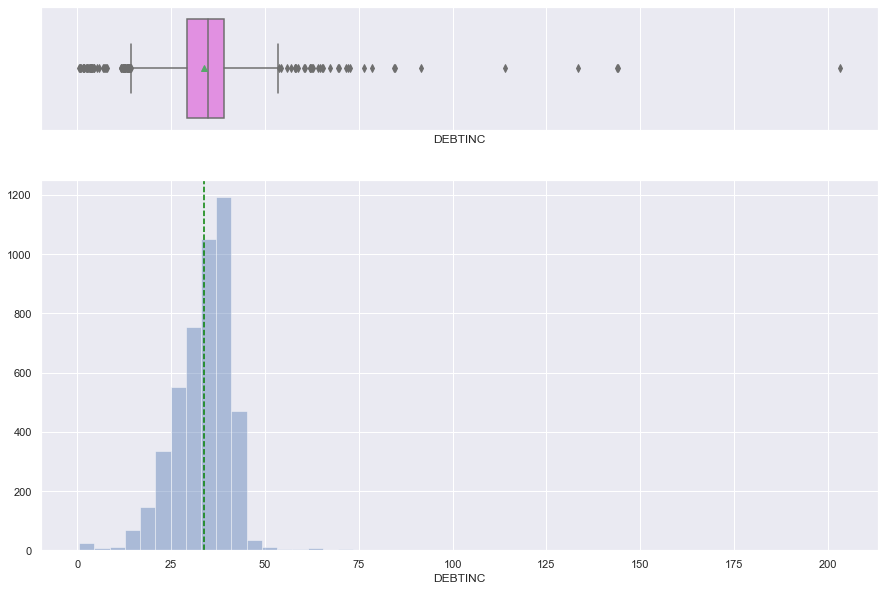

In [117]:
# Build the histogram boxplot for MORTDUE
histogram_boxplot(data['MORTDUE'])

# Build the histogram boxplot for VALUE
histogram_boxplot(data['VALUE'])

# Build the histogram boxplot for YOJ
histogram_boxplot(data['YOJ'])

# Build the histogram boxplot for DEROG
histogram_boxplot(data['DEROG'])

# Build the histogram boxplot for DELINQ
histogram_boxplot(data['DELINQ'])

# Build the histogram boxplot for CLAGE
histogram_boxplot(data['CLAGE'])

# Build the histogram boxplot for NINQ
histogram_boxplot(data['NINQ'])

# Build the histogram boxplot for CLNO
histogram_boxplot(data['CLNO'])

# Build the histogram boxplot for DEBTINC
histogram_boxplot(data['DEBTINC'])

    **Insights: MORTDUE is similar to LOAN in that it is skewed right with several outlayers in that direction. The majority of the data is normally distributed. For Value, we have some outlayers that are way out to the right, over 4x the mean. For YOJ we don't have a normal distribution. Most of the data is on the left with very few data points being over 10 years. For both DEROG and DELINQ, the majority of our data is 0, very few data points being over that. CLAGE is fairly noramally distrubited with a few outlays but they seem to be minimal. NINQ is pretty close to being 0 the majority of the time. CLNO is pretty normally distributed. NOt the smoothest and has several outlayers but still close to normal. DEBTINC looks a little left skewed. There are a few outlayers but doesn't look like too many. **

### **2. Univariate Analysis - Categorical Data**

In [118]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

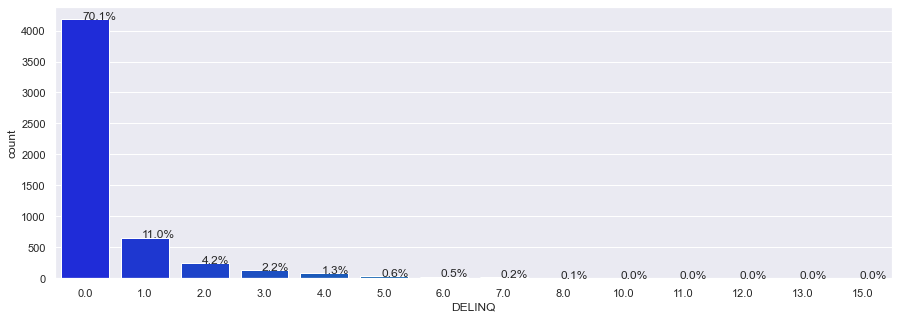

In [119]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Insights: Over 85% of DELINQ take placy in 0-2, with everything being under 10.**

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

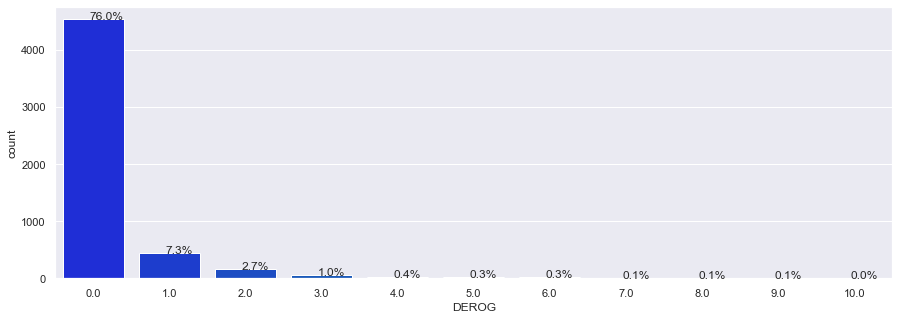

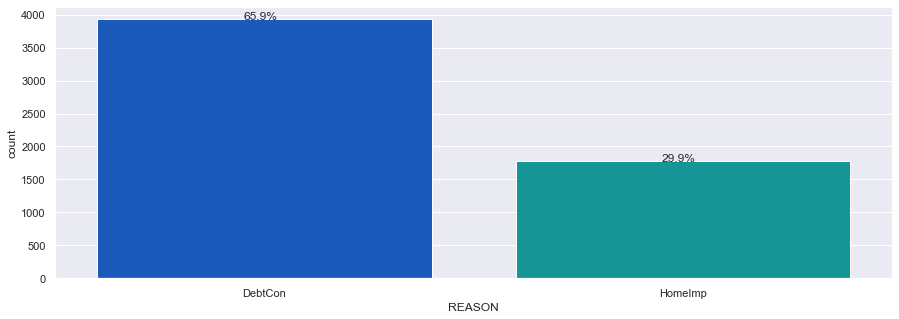

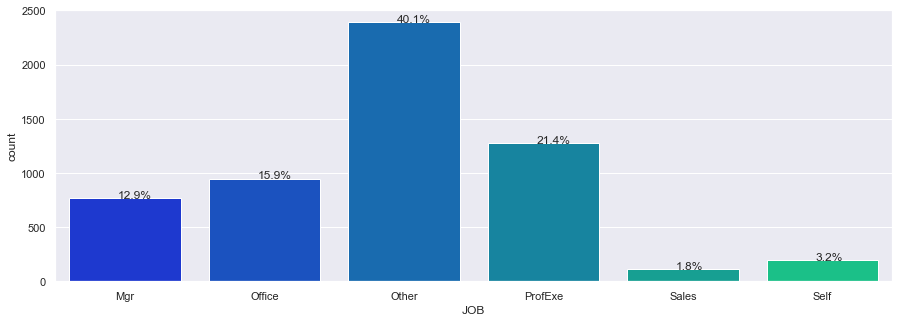

In [120]:
#Build barplot for DEROG

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DEROG"],palette='winter')
perc_on_bar(ax,data["DEROG"])

#Build barplot for REASON

plt.figure(figsize=(15,5))
ax = sns.countplot(data["REASON"],palette='winter')
perc_on_bar(ax,data["REASON"])

#Build barplot for JOB

plt.figure(figsize=(15,5))
ax = sns.countplot(data["JOB"],palette='winter')
perc_on_bar(ax,data["JOB"])

**Insights: Almost all of DEROG is less than 2. 2/3 of reasons for the loan have been Debt Consolidation. The vast majority of the jobs have been Other with ProfExe being the next hightest. **

## **Bivariate Analysis**

###**Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

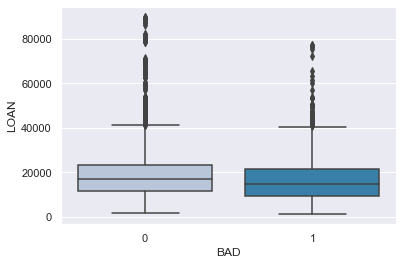

In [121]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

**Insights: The loan value doesn't appear to have that much affect on whether its going to be a Good or BAD loan. **

####**Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

<AxesSubplot:xlabel='BAD', ylabel='DEBTINC'>

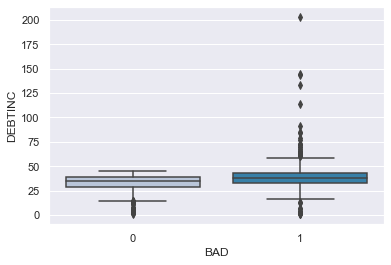

In [122]:
#sns.boxplot(data["BAD"],data['MORTDUE'],palette="PuBu")

#sns.boxplot(data["BAD"],data['VALUE'],palette="PuBu")

#sns.boxplot(data["BAD"],data['YOJ'],palette="PuBu")

#sns.boxplot(data["BAD"],data['CLAGE'],palette="PuBu")

#sns.boxplot(data["BAD"],data['NINQ'],palette="PuBu")

#sns.boxplot(data["BAD"],data['CLNO'],palette="PuBu")

sns.boxplot(data["BAD"],data['DEBTINC'],palette="PuBu")

### **Bivariate Analysis: Two Continuous Variables**

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

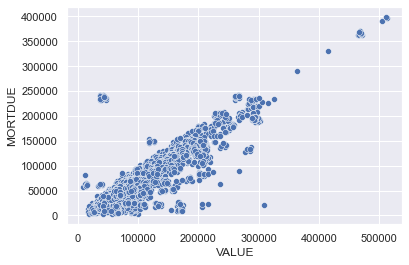

In [123]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

**Insights: There appears to be some correlation between MORTDUE and VALUE. **

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

<AxesSubplot:xlabel='CLAGE', ylabel='CLNO'>

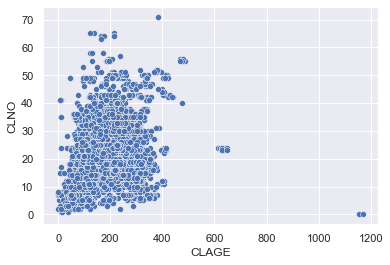

In [124]:
sns.scatterplot(data["CLAGE"],data['CLNO'],palette="PuBu")

**Insights: Majority of cred lines are not over 400 months old, so realativly less that 4 years old.**

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [125]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


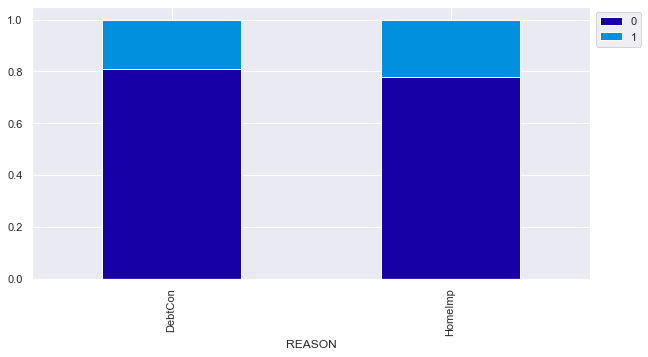

In [126]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights: Around 20 percent of both DebtCon and HomeImp default on their loans. Slightly more on HomeImp.**

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


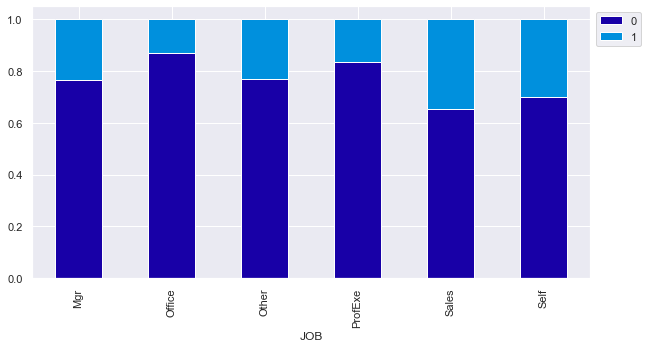

In [127]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['JOB'])

BAD       0     1   All
DEROG                  
0.0    3773   754  4527
1.0     266   169   435
2.0      78    82   160
3.0      15    43    58
4.0       5    18    23
5.0       8     7    15
6.0       5    10    15
7.0       0     8     8
8.0       0     6     6
9.0       0     3     3
10.0      0     2     2
All    4150  1102  5252
------------------------------------------------------------------------------------------------------------------------


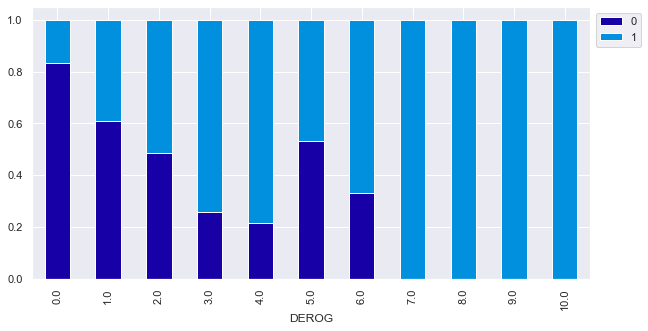

In [128]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['DEROG'])

BAD        0     1   All
DELINQ                  
0.0     3596   583  4179
1.0      432   222   654
2.0      138   112   250
3.0       58    71   129
4.0       32    46    78
5.0        7    31    38
6.0        0    27    27
7.0        0    13    13
8.0        0     5     5
10.0       0     2     2
11.0       0     2     2
12.0       0     1     1
13.0       0     1     1
15.0       0     1     1
All     4263  1117  5380
------------------------------------------------------------------------------------------------------------------------


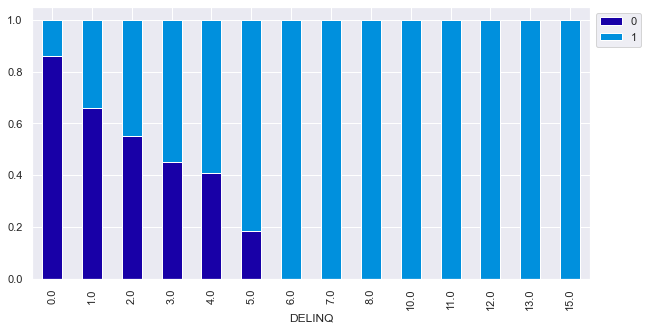

In [129]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['DELINQ'])

**Insights: sALES and Self Employeed have the highest numbers of defaults. As DEROG increas, Defaluts increase significantly. Same as DELINQ. **

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

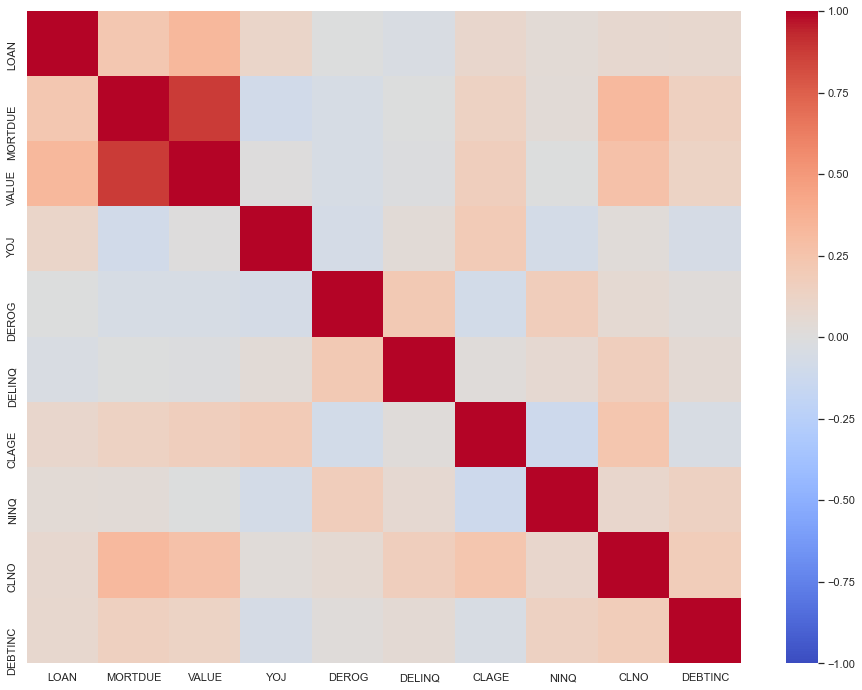

In [130]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = data[numerical_col].corr()

# plot the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

In [131]:
data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0   1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1   1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2   1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3   1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4   0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

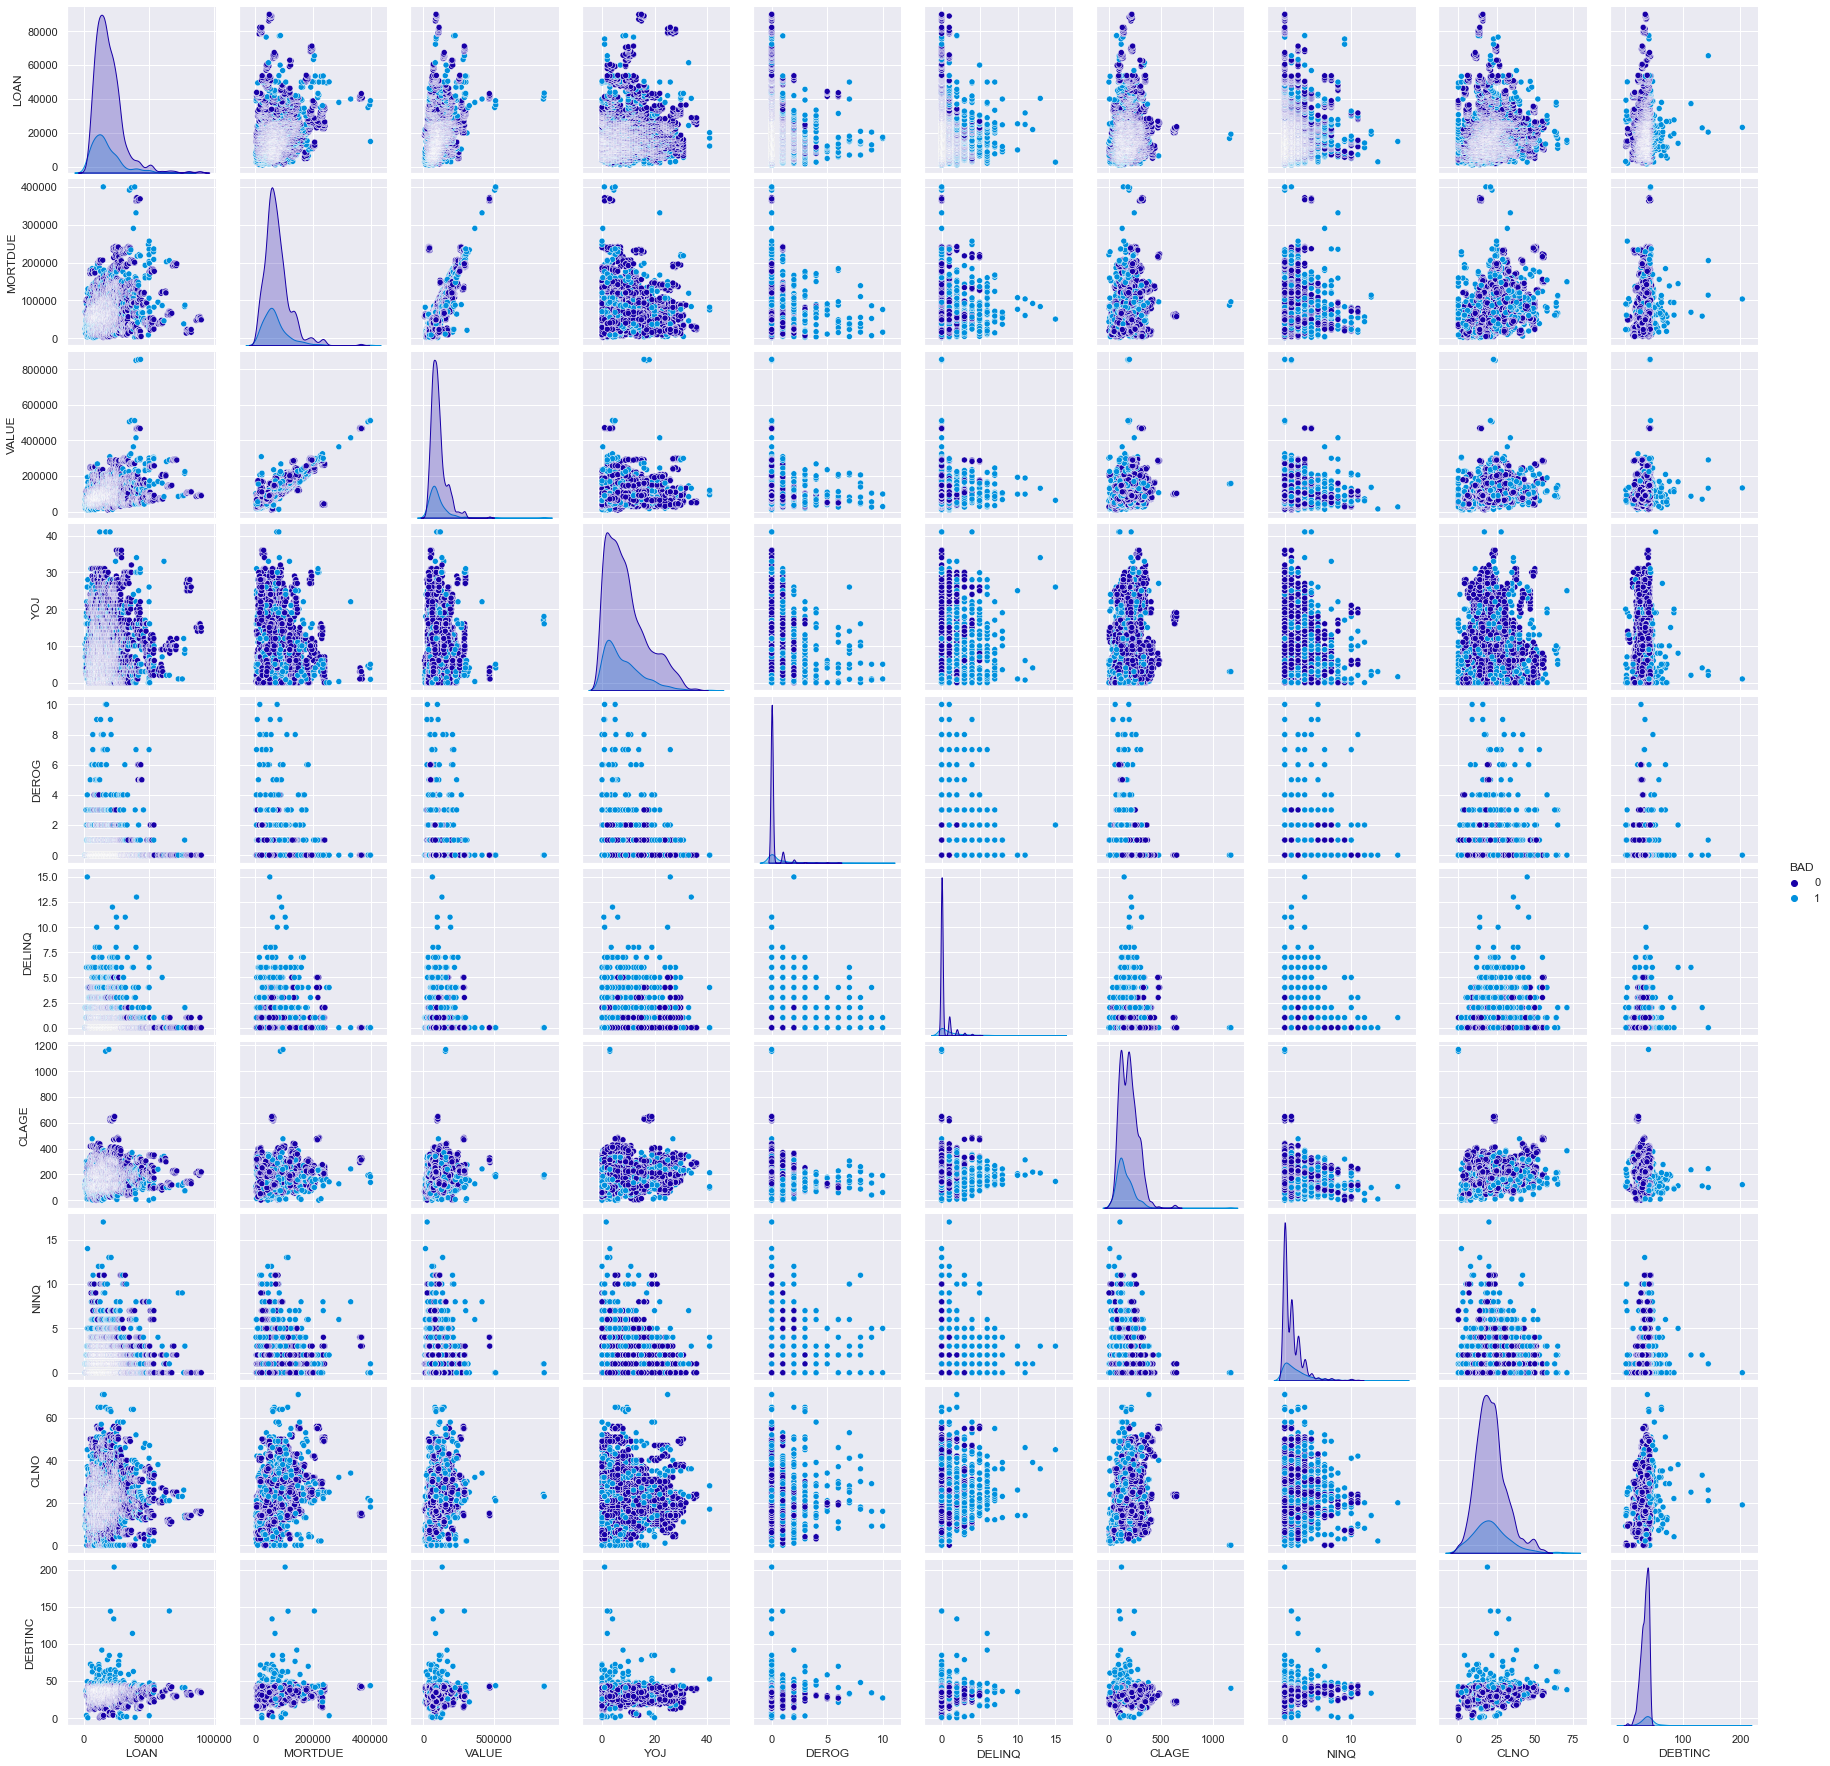

In [132]:
# Build pairplot for the data with hue = 'BAD'

sns.pairplot(data=data, hue = 'BAD')

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them? 
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

#### Treating Outliers

In [133]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=df.quantile(q=0.25, axis=1) # 25th quantile
    Q3=df.quantile(q=0.75, axis=1)  # 75th quantile
    IQR=Q3-Q1   # IQR Range
    Lower_Whisker = Q1-(1.5*IQR) #define lower whisker
    Upper_Whisker = Q3+(1.5*IQR)  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [134]:
data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0   1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1   1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2   1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3   1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4   0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [135]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw, numerical_col)

<AxesSubplot:xlabel='BAD', ylabel='DEBTINC'>

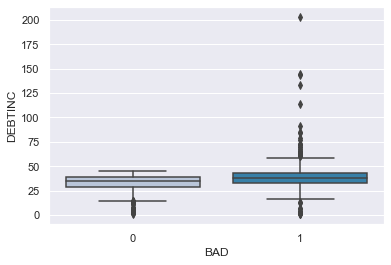

In [142]:
sns.boxplot(df["BAD"],df['DEBTINC'],palette="PuBu")

#### Adding new columns in the dataset for each column which has missing values 

In [39]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [40]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)
    

In [41]:
df.head()

BAD    LOAN  MORTDUE   VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0   1  1100.0   2748.5  2748.5  HomeImp   Other  10.5    0.0     0.0   
1   1  1300.0   3247.0  3247.0  HomeImp   Other   7.0    0.0     2.0   
2   1  1500.0   3748.5  3748.5  HomeImp   Other   4.0    0.0     0.0   
3   1  1500.0      NaN     NaN      NaN     NaN   NaN    NaN     NaN   
4   0  1700.0   4250.0  4250.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  ...  VALUE_missing_values_flag  REASON_missing_values_flag  \
0   94.366667  ...                      False                       False   
1  121.833333  ...                      False                       False   
2  149.466667  ...                      False                       False   
3         NaN  ...                       True                        True   
4   93.333333  ...                      False                       False   

   JOB_missing_values_flag  YOJ_missing_values_flag  \
0                    False                    False   
1                    False                    False   
2                    False                    False   
3                     True                     True   
4                    False                    False   

   DEROG_missing_values_flag  DELINQ_missing_values_flag  \
0                      False                       False   
1                      False                       False   
2                      False                       False   
3                       True                        True   
4                      False                       False   

   CLAGE_missing_values_flag  NINQ_missing_values_flag  \
0                      False                     False   
1                      False                     False   
2                      False                     False   
3                       True                      True   
4                      False                     False   

   CLNO_missing_values_flag  DEBTINC_missing_values_flag  
0                     False                         True  
1                     False                         True  
2                     False                         True  
3                      True                         True  
4                     False                         True  

[5 rows x 24 columns]

#### Filling missing values in numerical columns with median and mode in categorical variables

In [42]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
df[num_data.columns] = num_data.fillna(df.median())

# Fill object columns with model.
for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

In [43]:
df.head()

BAD    LOAN       MORTDUE         VALUE   REASON     JOB   YOJ  DEROG  \
0   1  1100.0   2748.500000   2748.500000  HomeImp   Other  10.5    0.0   
1   1  1300.0   3247.000000   3247.000000  HomeImp   Other   7.0    0.0   
2   1  1500.0   3748.500000   3748.500000  HomeImp   Other   4.0    0.0   
3   1  1500.0  31646.890825  33140.661982  DebtCon   Other   7.0    0.0   
4   0  1700.0   4250.000000   4250.000000  HomeImp  Office   3.0    0.0   

   DELINQ       CLAGE  ...  VALUE_missing_values_flag  \
0     0.0   94.366667  ...                      False   
1     2.0  121.833333  ...                      False   
2     0.0  149.466667  ...                      False   
3     0.0  173.329993  ...                       True   
4     0.0   93.333333  ...                      False   

   REASON_missing_values_flag  JOB_missing_values_flag  \
0                       False                    False   
1                       False                    False   
2                       False                    False   
3                        True                     True   
4                       False                    False   

   YOJ_missing_values_flag  DEROG_missing_values_flag  \
0                    False                      False   
1                    False                      False   
2                    False                      False   
3                     True                       True   
4                    False                      False   

   DELINQ_missing_values_flag  CLAGE_missing_values_flag  \
0                       False                      False   
1                       False                      False   
2                       False                      False   
3                        True                       True   
4                       False                      False   

   NINQ_missing_values_flag  CLNO_missing_values_flag  \
0                     False                     False   
1                     False                     False   
2                     False                     False   
3                      True                      True   
4                     False                     False   

   DEBTINC_missing_values_flag  
0                         True  
1                         True  
2                         True  
3                         True  
4                         True  

[5 rows x 24 columns]

<AxesSubplot:xlabel='BAD', ylabel='CLAGE'>

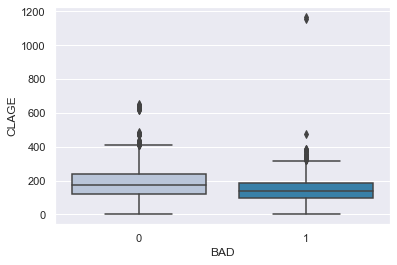

In [97]:
sns.boxplot(df["BAD"],df['CLAGE'],palette="PuBu")

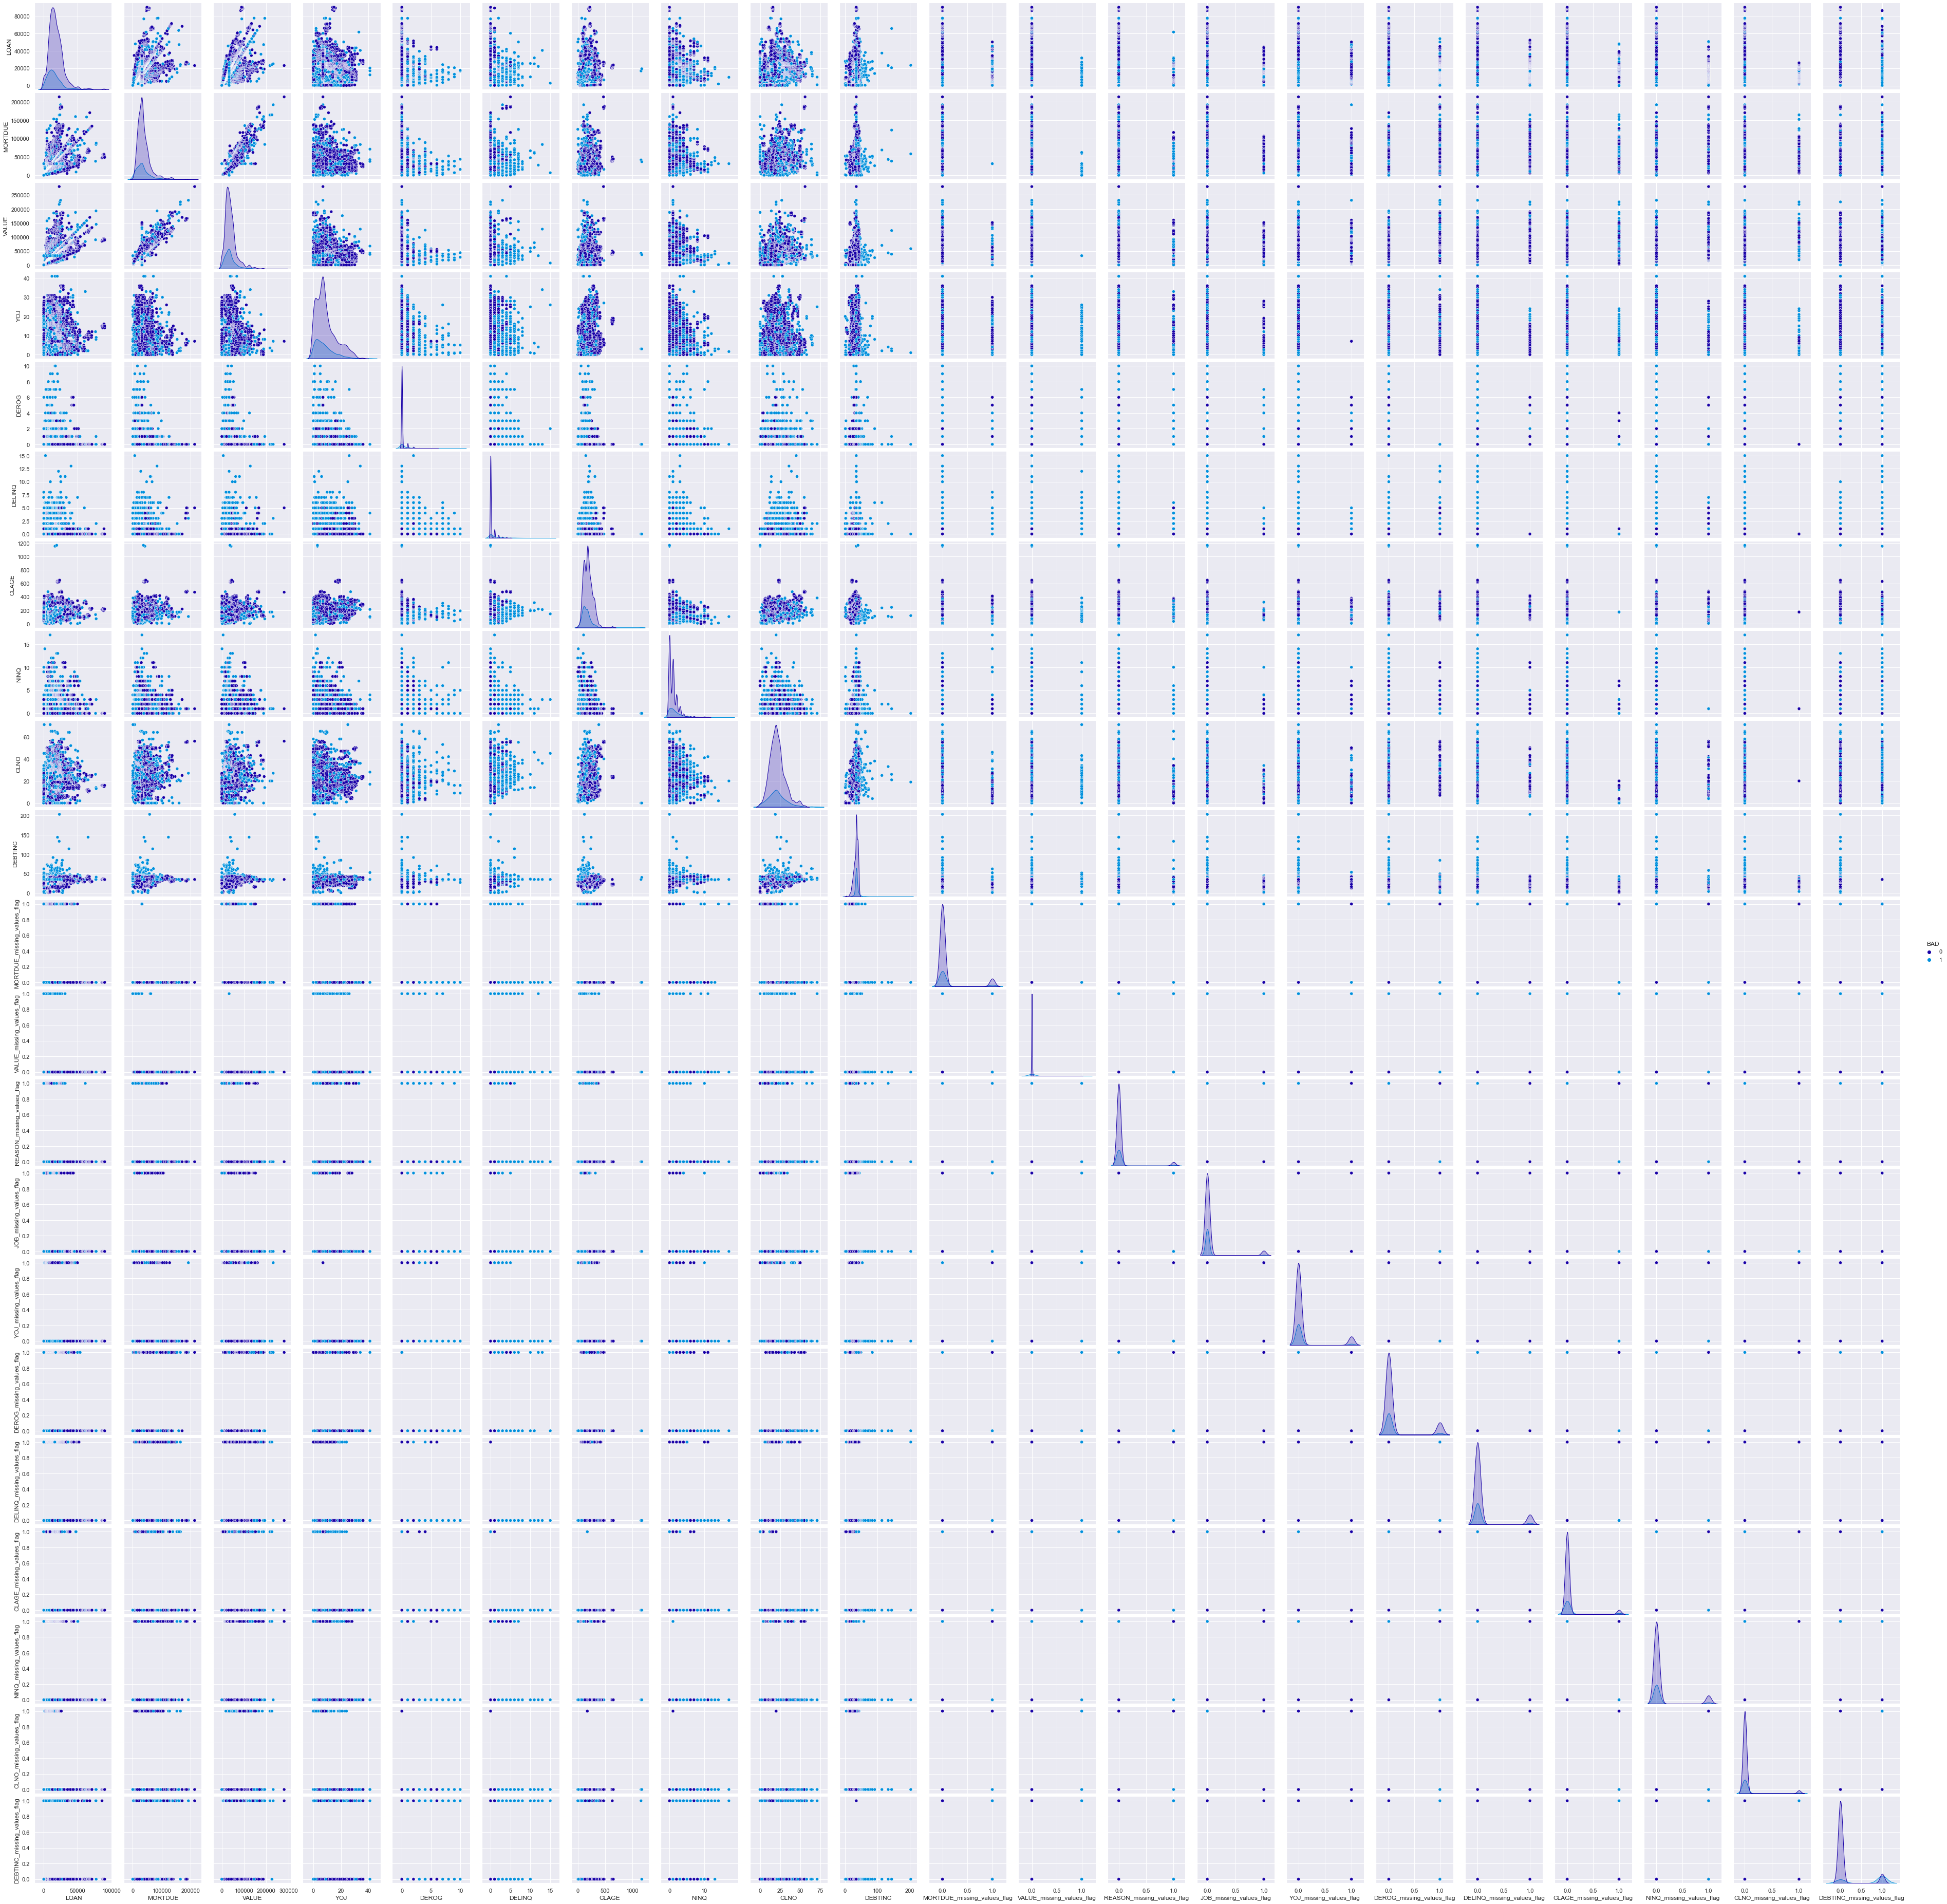

In [44]:
sns.pairplot(data=df, hue = 'BAD')

## **Proposed approach**
**1. Potential techniques** - What different techniques should be explored?
        We should look at different ML tecniques like Random Forests and decision trees. 
        
**2. Overall solution design** - What is the potential solution design?

**3. Measures of success** - What are the key measures of success?
        The keys for success are going to be limiting the number of loans that default, that get classified as good. 

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [47]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = df.drop(['BAD'], axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X)

# Create y(dependent varibale)
y = df.BAD
X.head()

LOAN       MORTDUE         VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  \
0  1100.0   2748.500000   2748.500000  10.5    0.0     0.0   94.366667   1.0   
1  1300.0   3247.000000   3247.000000   7.0    0.0     2.0  121.833333   0.0   
2  1500.0   3748.500000   3748.500000   4.0    0.0     0.0  149.466667   1.0   
3  1500.0  31646.890825  33140.661982   7.0    0.0     0.0  173.329993   1.0   
4  1700.0   4250.000000   4250.000000   3.0    0.0     0.0   93.333333   0.0   

   CLNO    DEBTINC  ...  CLNO_missing_values_flag  \
0   9.0  34.818262  ...                     False   
1  14.0  34.818262  ...                     False   
2  10.0  34.818262  ...                     False   
3  20.0  34.818262  ...                      True   
4  14.0  34.818262  ...                     False   

   DEBTINC_missing_values_flag  REASON_DebtCon  REASON_HomeImp  JOB_Mgr  \
0                         True               0               1        0   
1                         True               0               1        0   
2                         True               0               1        0   
3                         True               1               0        0   
4                         True               0               1        0   

   JOB_Office  JOB_Other  JOB_ProfExe  JOB_Sales  JOB_Self  
0           0          1            0          0         0  
1           0          1            0          0         0  
2           0          1            0          0         0  
3           0          1            0          0         0  
4           1          0            0          0         0  

[5 rows x 29 columns]

### **Splitting the data into 70% train and 30% test set**

In [48]:
# Split the data into training and test set

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

### **Think about it** 
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

In [49]:
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [50]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [51]:
# Defining the Logistic regression model
log_reg= LogisticRegression()
log_reg_2= LogisticRegression()

# Fitting the model on the training data 
log_reg.fit(x_train,y_train)
log_reg_2.fit(x_train_2,y_train_2)

LogisticRegression()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      3340
           1       0.61      0.12      0.20       832

    accuracy                           0.81      4172
   macro avg       0.71      0.55      0.55      4172
weighted avg       0.78      0.81      0.75      4172



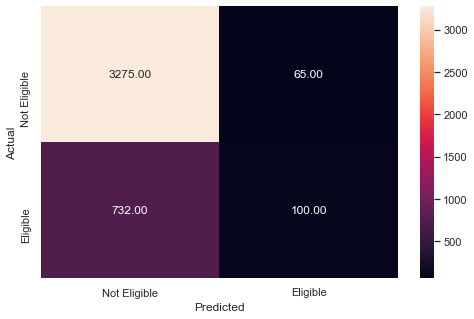

In [129]:
#Predict for train set
y_pred_train = log_reg.predict(x_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      3817
           1       0.64      0.05      0.10       951

    accuracy                           0.81      4768
   macro avg       0.73      0.52      0.50      4768
weighted avg       0.78      0.81      0.73      4768



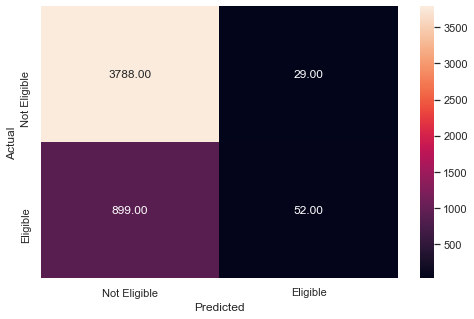

In [52]:
#Predict for train set
y_pred_train_2 = log_reg_2.predict(x_train_2)

#checking the performance on the train dataset
metrics_score(y_train_2, y_pred_train_2)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1431
           1       0.57      0.12      0.19       357

    accuracy                           0.81      1788
   macro avg       0.69      0.55      0.54      1788
weighted avg       0.77      0.81      0.75      1788



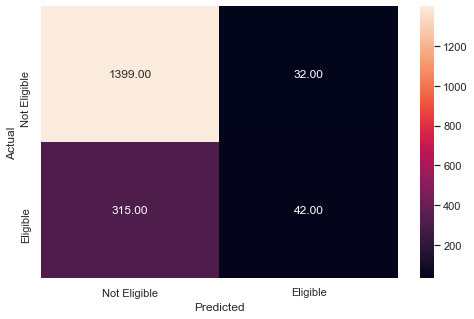

In [130]:
#Predict for test set
y_pred_test = log_reg.predict(x_test)

#checking the performance on the test dataset
metrics_score(y_test, y_pred_test)

**Observations: The model is doing a really good job on corretly predictly Not Eligible as well as limiting those predicted Eligible that are Not Eligible. The model does a terrible job at predictly Eligible, this is not quite as important as we are looking for predicting defaults. **

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       954
           1       0.53      0.11      0.18       238

    accuracy                           0.80      1192
   macro avg       0.67      0.54      0.53      1192
weighted avg       0.76      0.80      0.75      1192



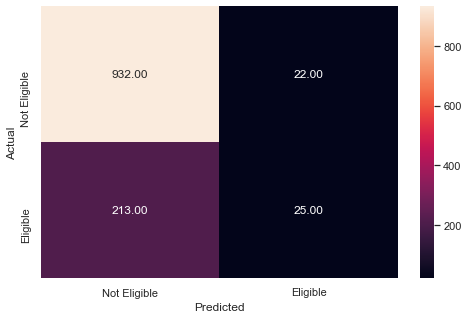

In [53]:
#Predict for test set
y_pred_test_2 = log_reg.predict(x_test_2)

#checking the performance on the test dataset
metrics_score(y_test_2, y_pred_test_2)

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [131]:
# Printing the coefficients of logistic regression
pd.Series(log_reg.coef_[0], index=x_train.columns).sort_values(ascending=False)

DELINQ                         0.125390
DEROG                          0.069834
DEBTINC_missing_values_flag    0.065434
NINQ                           0.057555
DEBTINC                        0.031272
VALUE_missing_values_flag      0.008910
JOB_Self                       0.002858
JOB_Mgr                        0.002839
JOB_Sales                      0.001734
REASON_HomeImp                 0.001535
VALUE                          0.000021
MORTDUE                       -0.000019
LOAN                          -0.000050
MORTDUE_missing_values_flag   -0.000736
CLAGE_missing_values_flag     -0.001610
REASON_missing_values_flag    -0.002109
CLNO_missing_values_flag      -0.003137
JOB_Other                     -0.004165
JOB_ProfExe                   -0.004592
CLAGE                         -0.005671
JOB_Office                    -0.007031
YOJ_missing_values_flag       -0.007210
JOB_missing_values_flag       -0.007302
REASON_DebtCon                -0.009893
NINQ_missing_values_flag      -0.010344


**Insights DELINQ has the largest affect on our model, followed by DEROG. These both make sense since deliquencies seem to be a good indicator if someone will payback their loan. It look like the missing values of DEBTINC could play a role in this as well. Maybe if the bank were to obtain that information we could build a better model. **

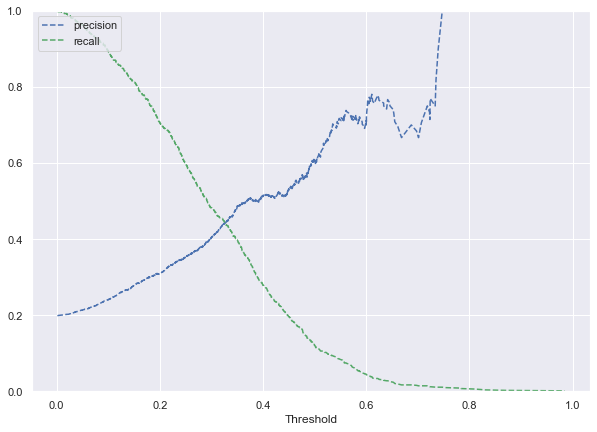

In [56]:
y_scores=log_reg.predict_proba(x_train) #predict_proba gives the probability of each observation belonging to each class


precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [57]:
#calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds)):
    if precisions[i]==recalls[i]:
        print(thresholds[i])

0.326317398658414


              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3340
           1       0.44      0.44      0.44       832

    accuracy                           0.78      4172
   macro avg       0.65      0.65      0.65      4172
weighted avg       0.78      0.78      0.78      4172



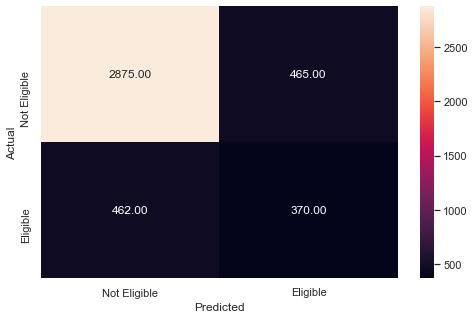

In [59]:
optimal_threshold1 = 0.326
metrics_score(y_train, y_scores[:,1]>optimal_threshold1)

### **Build a Decision Tree Model**

#### Data Preparation for the tree based model

In [61]:
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)
    

In [62]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
data[num_data.columns] = num_data.fillna(data.median())

# Fill object columns with model.
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

#### Separating the target variable y and independent variable x

In [63]:
# Drop dependent variable from dataframe and create the X(independent variable) matrix
X = data.drop(['BAD'], axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X)

# Create y(dependent varibale)
y = data.BAD

#### Split the data

In [64]:
# Split the data into training and test set
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y) 

In [65]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
dt = DecisionTreeClassifier(class_weight={0:0.2,1:0.8}, random_state=1)

In [66]:
#fitting Decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



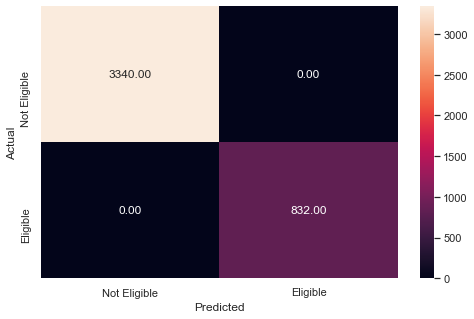

In [67]:
# Checking performance on the training data
y_train_pred_dt=dt.predict(x_train)
metrics_score(y_train,y_train_pred_dt)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1431
           1       0.71      0.61      0.65       357

    accuracy                           0.87      1788
   macro avg       0.81      0.77      0.79      1788
weighted avg       0.87      0.87      0.87      1788



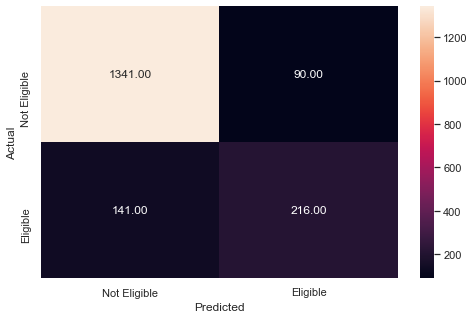

In [68]:
# Checking performance on the testing data
y_test_pred_dt=dt.predict(x_test)
metrics_score(y_test,y_test_pred_dt)

**Insights This ran perfectly on the train data and not so well on the test. This leads me to believe the this model is overfitting. **

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [69]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.2,1:0.8}, random_state=1)


# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label=1)


# Run the grid search
gridCV= GridSearchCV(dtree_estimator, parameters, scoring=scorer,cv=10)


# Fit the GridSearch on train dataset
gridCV = gridCV.fit(x_train, y_train)


# Set the clf to the best combination of parameters
dtree_estimator = gridCV.best_estimator_


# Fit the best algorithm to the data. 
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=5,
                       min_samples_leaf=25, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3340
           1       0.64      0.79      0.71       832

    accuracy                           0.87      4172
   macro avg       0.79      0.84      0.81      4172
weighted avg       0.88      0.87      0.88      4172



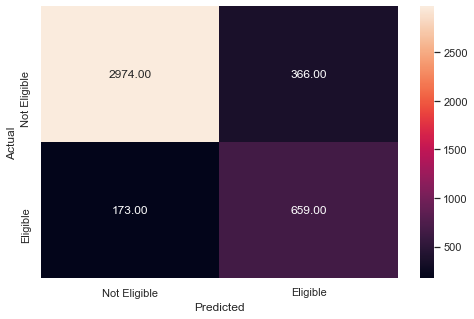

In [70]:
# Checking performance on the training data based on the tuned model
y_train_pred_dt=dtree_estimator.predict(x_train)
metrics_score(y_train,y_train_pred_dt)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1431
           1       0.62      0.74      0.68       357

    accuracy                           0.86      1788
   macro avg       0.78      0.81      0.79      1788
weighted avg       0.87      0.86      0.86      1788



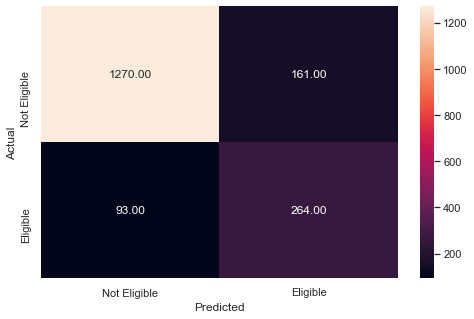

In [71]:
# Checking performance on the testing data based on the tuned model
y_test_pred_dt=dtree_estimator.predict(x_test)
metrics_score(y_test,y_test_pred_dt)


**Insights This model is much improved from the previous. Its not over fitting as the train and the test both have a recall of 0.89 and the f1-score and precision are right around the same values as well. **

#### Plotting the Decision Tree

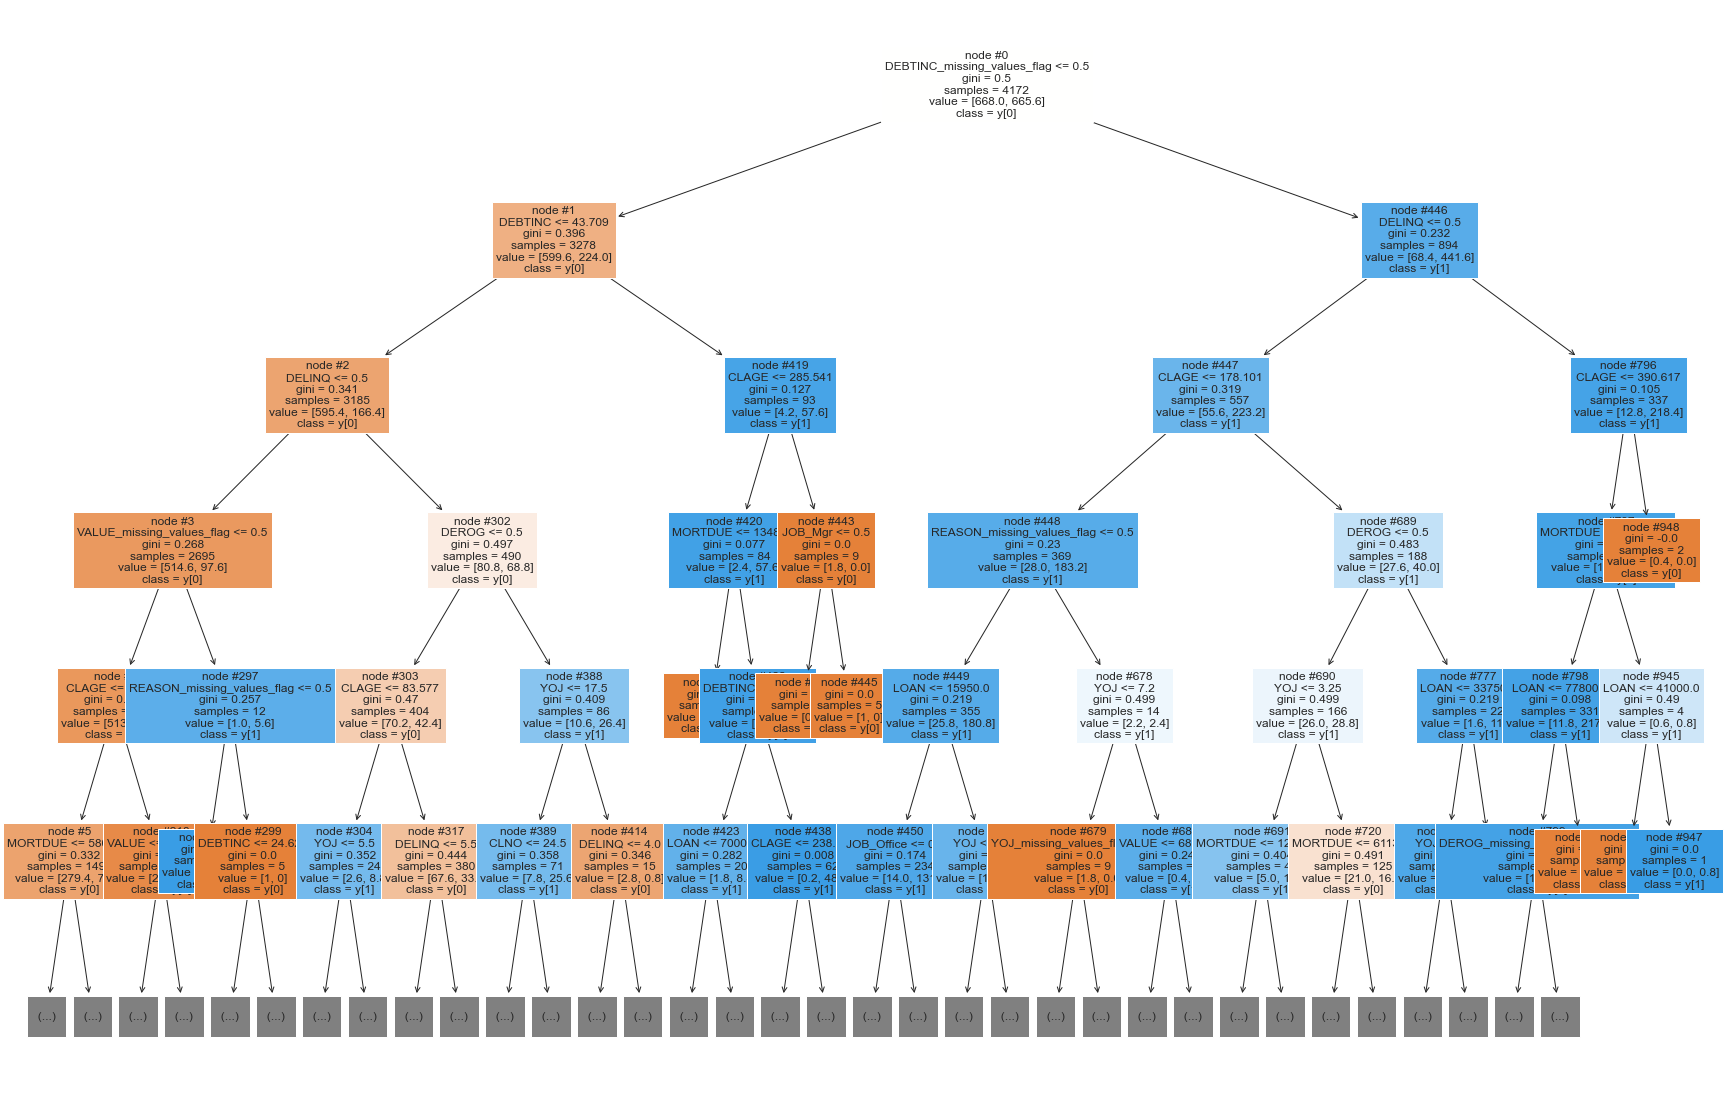

In [72]:
# Plot the decision  tree and analyze it to build the decision rule
features = list(X.columns)

plt.figure(figsize=(30,20))

tree.plot_tree(dt,max_depth=5,feature_names=features,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()

#### Deduce the business rules apparent from the Decision Tree and write them down: Debt to income less than 43.7, Deliquencies less than 1, and Credit Line ages less than 182 month and you will not default on your loan. 

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [73]:
# Defining Random forest CLassifier
rf_estimator = RandomForestClassifier()
rf_estimator.fit(x_train,y_train)

RandomForestClassifier()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



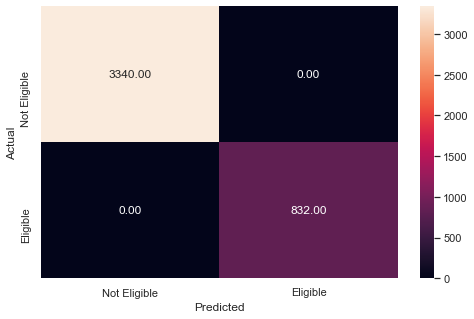

In [74]:
#Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)
metrics_score(y_train, y_pred_train_rf)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1431
           1       0.84      0.68      0.75       357

    accuracy                           0.91      1788
   macro avg       0.88      0.82      0.85      1788
weighted avg       0.91      0.91      0.91      1788



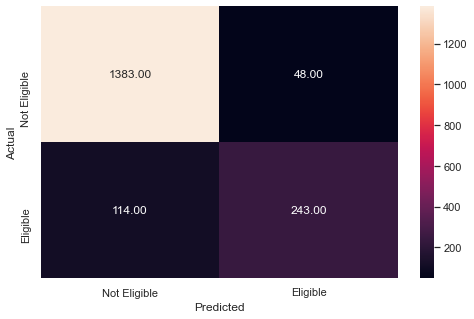

In [75]:
# Checking performance on the test data
y_pred_test_rf = rf_estimator.predict(x_test)
metrics_score(y_test, y_pred_test_rf)

**Observations: The model seems to be overfitting on the training set of data, however its still performing very well on the test data. There could still be room for improvment. **

### **Build a Random Forest model with Class Weights**

In [76]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

rf_model = RandomForestClassifier(class_weight={0:0.2,1:0.8})

# Fitting Random Forest model
rf_model.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8})

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



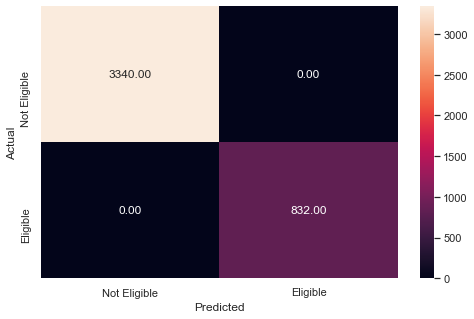

In [77]:
# Checking performance on the train data
y_pred_train_rf = rf_model.predict(x_train)
metrics_score(y_train, y_pred_train_rf)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1431
           1       0.84      0.63      0.72       357

    accuracy                           0.90      1788
   macro avg       0.88      0.80      0.83      1788
weighted avg       0.90      0.90      0.90      1788



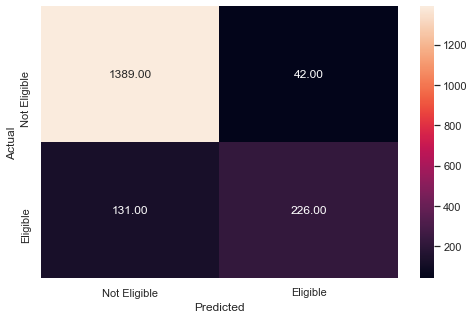

In [78]:
# Checking performance on the test data
y_pred_test_rf = rf_model.predict(x_test)
metrics_score(y_test, y_pred_test_rf)

### **Think about it:**
- Can we try different weights?
- If yes, should we increase or decrease class weights for different classes? 

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [151]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(class_weight={0:0.2,1:0.8})


# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100,250,500],
        "min_samples_leaf": np.arange(1, 4,1),
        "max_features": [0.7,0.9,'auto'],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label=1)


# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring=scorer, cv=5)


#fit the GridSearch on train dataset
grid_obj = grid_obj.fit(x_train, y_train)


# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, min_samples_leaf=3,
                       n_estimators=250)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3340
           1       0.86      0.98      0.92       832

    accuracy                           0.97      4172
   macro avg       0.93      0.97      0.95      4172
weighted avg       0.97      0.97      0.97      4172



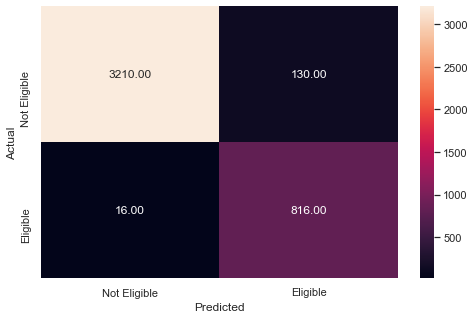

In [152]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)
metrics_score(y_train, y_pred_train_rf_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1431
           1       0.75      0.73      0.74       357

    accuracy                           0.90      1788
   macro avg       0.84      0.84      0.84      1788
weighted avg       0.90      0.90      0.90      1788



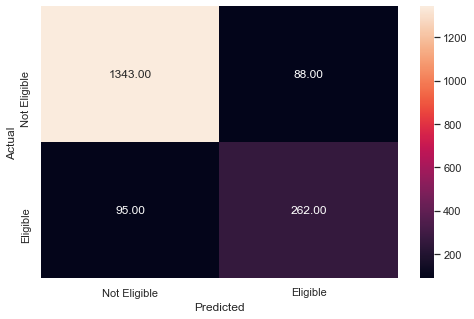

In [153]:
# Checking performace on test dataset
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)
metrics_score(y_test, y_pred_test_rf_tuned)

**Insights: There is some slight improvement in precision. It doesn't appear to be over fitting on this one. Maybe we could tweek the parameters for futher improvment. **

#### Plot the Feature importance of the tuned Random Forest

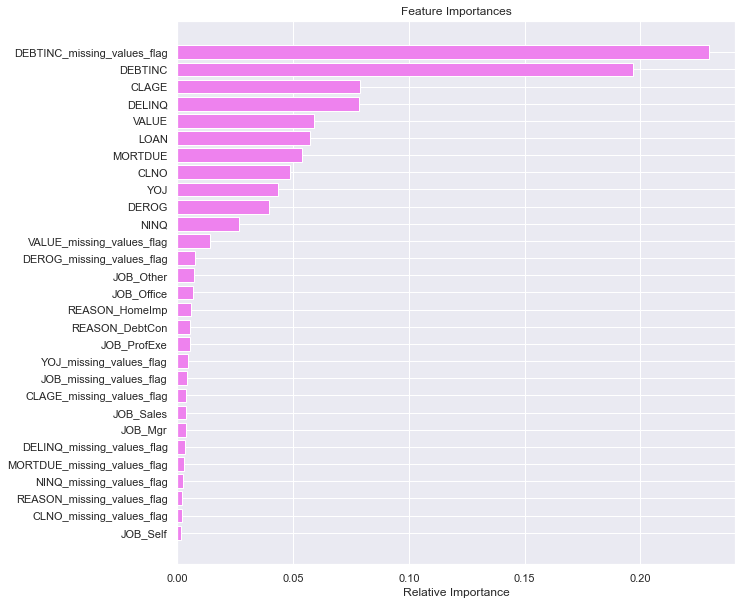

In [155]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest 
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement? 

In [81]:
knn = KNeighborsClassifier()

# We select the best value of k for which the error rate is the least in the validation data
# Let us loop over a few values of k to determine the best k

train_error = []
test_error = []
knn_many_split = {}

error_df_knn = pd.DataFrame()
features = X.columns

for k in range(1,15):
    train_error = []
    test_error = []
    lista = []
    knn = KNeighborsClassifier(n_neighbors=k)
    for i in range(30):
        x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size = 0.20)
    
        #Fitting knn on training data
        knn.fit(x_train_new, y_train_new)
        #Calculating error on training and validation data
        train_error.append(1 - knn.score(x_train_new, y_train_new)) 
        test_error.append(1 - knn.score(x_val, y_val))
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    knn_many_split[k] = lista

knn_many_split

{1: [0.0, 0.22147704590818362],
 2: [0.1231145739686345, 0.1820758483033932],
 3: [0.1159224852662072, 0.19021956087824357],
 4: [0.15060433523124564, 0.18383233532934135],
 5: [0.14516032364399162, 0.18770459081836327],
 6: [0.16213165517930275, 0.18415169660678646],
 7: [0.15784636899410645, 0.18650698602794413],
 8: [0.17009289781240639, 0.182874251497006],
 9: [0.16736589751273598, 0.1888622754491018],
 10: [0.1741184696833483, 0.184311377245509],
 11: [0.17152132654080515, 0.18590818363273445],
 12: [0.1767256018379782, 0.18459081836327346],
 13: [0.17513734891619218, 0.1852694610778443],
 14: [0.17742483268404755, 0.1856686626746507]}

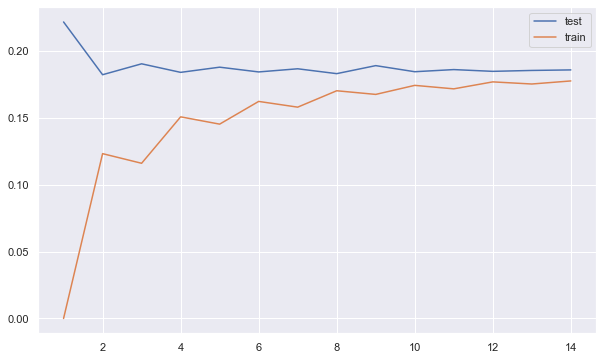

In [82]:
kltest = []
vltest = []
for k, v in knn_many_split.items():
    kltest.append(k)
    vltest.append(knn_many_split[k][1])

kltrain = []
vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    vltrain.append(knn_many_split[k][0])

# Plotting k vs error
plt.figure(figsize=(10,6))
plt.plot(kltest,vltest, label = 'test' )
plt.plot(kltrain,vltrain, label = 'train')
plt.legend()
plt.show()

In [86]:
#define knn model
knn=KNeighborsClassifier(n_neighbors=4)

In [87]:
#fitting data to the KNN model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      3340
           1       0.90      0.27      0.42       832

    accuracy                           0.85      4172
   macro avg       0.88      0.63      0.67      4172
weighted avg       0.86      0.85      0.82      4172



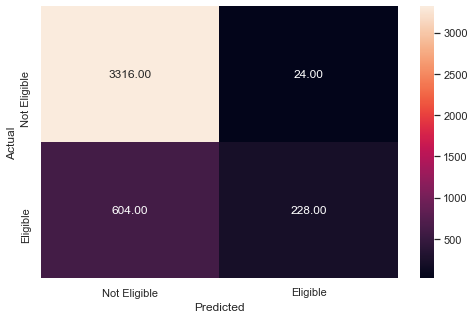

In [88]:
#checking the performance of knn model
y_pred_train_knn = knn.predict(x_train)
metrics_score(y_train, y_pred_train_knn)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1431
           1       0.56      0.17      0.26       357

    accuracy                           0.81      1788
   macro avg       0.69      0.57      0.58      1788
weighted avg       0.77      0.81      0.76      1788



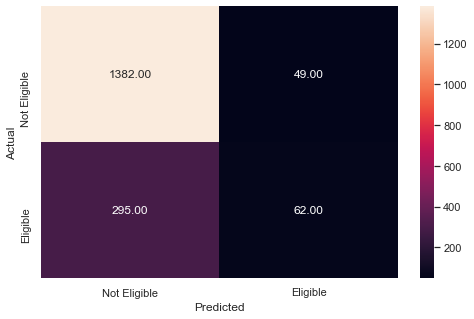

In [89]:
y_pred_test_knn = knn.predict(x_test)
metrics_score(y_test, y_pred_test_knn)

In [90]:
params_knn={'n_neighbors':np.arange(3,15),'weights':['uniform','distance'],'p':[1,2]}

grid_knn=GridSearchCV(estimator=knn,param_grid=params_knn,scoring='recall',cv=10)

model_knn=grid_knn.fit(x_train,y_train)

knn_estimator = model_knn.best_estimator_
print(knn_estimator)

KNeighborsClassifier(n_neighbors=4, weights='distance')


In [91]:
#Fit the best estimator on the training data
knn_estimator.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



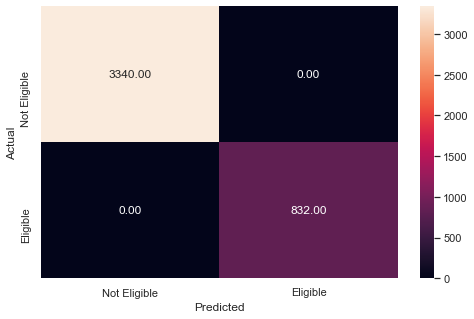

In [92]:
y_pred_train_knn_estimator = knn_estimator.predict(x_train)
metrics_score(y_train, y_pred_train_knn_estimator)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1431
           1       0.48      0.30      0.37       357

    accuracy                           0.80      1788
   macro avg       0.66      0.61      0.62      1788
weighted avg       0.77      0.80      0.78      1788



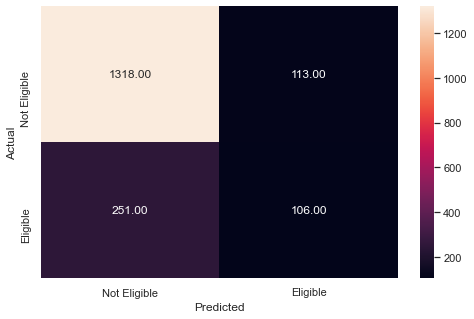

In [93]:
y_pred_test_knn_estimator = knn_estimator.predict(x_test)
metrics_score(y_test, y_pred_test_knn_estimator)

### **Comparing Model Performances**

In [157]:
def get_recall_score(model,flag=True,x_train=x_train,x_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [158]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,x_train=x_train,x_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [159]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=x_train,X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [160]:
# Make the list of all the model names 

models = [log_reg, dtree_estimator, rf_model, rf_estimator_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [161]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]
comparison_frame = pd.DataFrame({'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'Random Forest Truned'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0   Logistic Regression        0.789310       0.779642      0.317308   
1         Decision Tree        0.870805       0.857942      0.792067   
2         Random Forest        1.000000       0.904362      1.000000   
3  Random Forest Truned        0.965005       0.897651      0.980769   

   Test_Recall  Train_Precision  Test_Precision  
0     0.263305         0.459130        0.417778  
1     0.739496         0.642927        0.621176  
2     0.635854         1.000000        0.847015  
3     0.733894         0.862579        0.748571

**Insights: The Tuned Random Forest appears to have the best overall performace based off the metrics above. However, I believe I can achieve better results with some more turning or possible some different methods.**

**1. Refined insights -** What are the most meaningful insights from the data relevant to the problem?

**2. Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**3. Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?